## SIR MODEL
* **S**usceptible people:people who could catch the disease
* **I**nfected people:people who have the disease and can spread it
* **R**ecovered/**R**emoved people:people who have recovered/had already the disease and cannot get it again


In [245]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [305]:
de=pd.read_excel("Data_coronavirus_Maroc.xlsx")
de.head()

,Date,Tests effectués,Cas négatifs,Cas positifs,Cas décédés,Cas rétablis,Nouveaux cas
0,2032020,29,28,1,0,0,1
1,3032020,33,32,1,0,0,0
2,4032020,35,34,1,0,0,0
3,5032020,50,48,2,0,0,1
4,6032020,52,50,2,0,0,0


In [306]:
de.columns

Index(['Date', 'Tests effectués', 'Cas négatifs', 'Cas positifs',
       'Cas décédés', 'Cas rétablis', 'Nouveaux cas'],
      dtype='object')

In [307]:
de.dtypes

Date                int64
Tests effectués     int64
Cas négatifs        int64
Cas positifs       object
Cas décédés         int64
Cas rétablis        int64
Nouveaux cas        int64
dtype: object

In [308]:
df=de.copy()
df.drop(columns=['Cas positifs'],inplace=True)
df

,Date,Tests effectués,Cas négatifs,Cas décédés,Cas rétablis,Nouveaux cas
0,2032020,29,28,0,0,1
1,3032020,33,32,0,0,0
2,4032020,35,34,0,0,0
3,5032020,50,48,0,0,1
4,6032020,52,50,0,0,0
...,...,...,...,...,...,...
59,30042020,34841,30418,170,984,102
60,1052020,37006,32437,171,1083,146
61,2052020,39367,34638,173,1256,160
62,3052020,42112,37209,174,1438,174


In [329]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

614604
None


C:\Users\kaout\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kaout\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


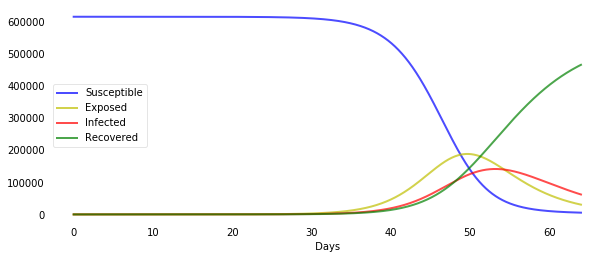

In [351]:
N = df['Tests effectués'].sum()
print(N)

D = 4.0 # infections lasts four days

gamma = 1.0 / D

delta = 1.0 / 5.0  # incubation period of five days

R_0 = 5.0

beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma

alpha = 0.2  # 10% death rate

rho = 1/9  # 9 days from infection until death

S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0  # initial conditions: one exposed

susceptible=df["Tests effectués"]
infected=df["Nouveaux cas"]
recovered=df["Cas rétablis"]+df["Cas décédés"]

recovered = 0
infected = 1
susceptible = total_pop - infected - recovered

t = np.linspace(0, 64, N) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
#x = df['Date']


def plotseird(t, S, E, I, R, D):
    f, ax = plt.subplots(figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

    ax.set_xlabel(' Days ')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)

    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
plt.show()
  
print(plotseird(t, S, E, I, R, D))


* **Effective contact rate** is transmission rate * contact rate, so:
**--** 3.6 for transmission rate and 5 contacts a day is 3.6 * 10 = 18
* **Recovery rate** is 1 / days, so
**--** For example, 4 day recovery rate is 1 / 4 = 0.25


In [304]:
Effective_contact_rate = 0.25
Recovery_rate = 1/4
print("R0 is", Effective_contact_rate / Recovery_rate)

R0 is 1.0


In [352]:
sir_data=pd.DataFrame({'S':ret.T[0],'I':ret.T[2],'R':ret.T[3]})
sir_data

,S,I,R
0,614603.000000,0.000000,0.000000e+00
1,614603.000000,0.000021,2.168647e-10
2,614603.000000,0.000042,8.674519e-10
3,614603.000000,0.000062,1.951743e-09
4,614603.000000,0.000083,3.469717e-09
...,...,...,...
614599,5424.739981,61964.827517,4.651330e+05
614600,5424.668791,61964.026748,4.651342e+05
614601,5424.597603,61963.225986,4.651355e+05
614602,5424.526417,61962.425231,4.651368e+05
